# **City Pollution Analysis – India (2015–2020)**

This project analyzes air quality data from Indian cities using Python (Pandas, Matplotlib, Seaborn).  
We will perform data cleaning, exploratory data analysis (EDA), and visualizations to find pollution trends.  

**Author:** Akash  
**Date:** August 2025



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##  Dataset Overview**

In this step, we will:
- Load the dataset into a Pandas DataFrame.
- View the first few rows to understand the structure.
- Check the number of rows, columns, and basic info about the dataset.



In [2]:
df = pd.read_csv("air_quality_india.csv")
df.head(10)




,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,325.8,Very Poor
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,262.7,Poor
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,341.8,Very Poor
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,206.3,Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,339.8,Very Poor
5,Delhi,2015-01-02,344.2,173.2,179.8,128.4,156.1,15.6,6.28,7.5,9.4,494.2,Severe
6,Mumbai,2015-01-02,59.2,335.7,182.1,143.8,207.3,44.8,5.81,6.4,145.5,285.7,Poor
7,Chennai,2015-01-02,418.9,573.8,23.8,17.5,43.0,22.5,4.49,9.5,198.7,276.4,Poor
8,Kolkata,2015-01-02,329.8,599.3,139.1,34.0,75.2,24.1,3.63,63.4,111.2,479.8,Severe
9,Bangalore,2015-01-02,22.5,317.5,163.0,62.4,130.9,46.7,0.00,59.7,49.8,267.5,Poor


In [3]:
# Shape of dataset (rows, columns)
df.shape

(18265, 13)

In [4]:
## **Step 2 – Basic Statistics & Missing Values Check**

# In this step, we will:
# - Get statistical summary of numerical columns.
# # - Identify missing values in the dataset.
# - This helps us understand data distribution and data quality issues.


In [5]:
# Statistical summary for numerical columns
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,250.597695,299.442491,100.481035,75.415916,125.964079,25.065042,5.002451,49.835839,100.406740,317.505212
std,144.460292,173.479906,57.774795,43.460066,72.403893,14.452019,2.889439,28.988739,57.591436,113.894816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.900000
25%,125.700000,150.100000,50.600000,37.700000,63.100000,12.600000,2.490000,24.400000,50.600000,207.100000
50%,251.000000,300.300000,100.200000,76.000000,126.200000,25.300000,5.000000,49.900000,100.700000,331.600000
75%,376.200000,450.000000,151.000000,113.200000,188.900000,37.600000,7.510000,75.100000,150.400000,414.000000
max,499.900000,600.000000,200.000000,150.000000,250.000000,50.000000,10.000000,100.000000,200.000000,500.000000


In [6]:
 # List all column names in the dataset.
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
# Check the data types of each column
df.dtypes

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
AQI           float64
AQI_Bucket     object
dtype: object

##   Unique Values & Sample Data Preview**

In this step, we will:
- Preview the first 5 rows of the dataset.
- Check the number of unique values in each column.
- This helps in understanding categorical columns and data spread.


In [8]:
 # Preview the first 5 rows of the dataset.
df.head(5)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,325.8,Very Poor
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,262.7,Poor
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,341.8,Very Poor
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,206.3,Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,339.8,Very Poor


In [9]:
# Count unique values in each column
df.nunique()


City             5
Datetime      3653
PM2.5         4876
PM10          5709
NO            2000
NO2           1501
NOx           2498
NH3            501
CO            1001
SO2           1001
O3            2001
AQI           3848
AQI_Bucket       6
dtype: int64

##  Missing Values Analysis**

In this step, we will:
- Check if there are any missing (null) values in the dataset.
- This helps us decide if data cleaning or imputation is required.


In [10]:
# Check missing values in each column
df.isnull().sum()


City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
dtype: int64

In [11]:
# Check percentage of missing values
(df.isnull().sum() / len(df)) * 100


City          0.0
Datetime      0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

In [12]:
# Dataset Information and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  object 
 1   Datetime    18265 non-null  object 
 2   PM2.5       18265 non-null  float64
 3   PM10        18265 non-null  float64
 4   NO          18265 non-null  float64
 5   NO2         18265 non-null  float64
 6   NOx         18265 non-null  float64
 7   NH3         18265 non-null  float64
 8   CO          18265 non-null  float64
 9   SO2         18265 non-null  float64
 10  O3          18265 non-null  float64
 11  AQI         18265 non-null  float64
 12  AQI_Bucket  18265 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


##  Basic Dataset Information

In [13]:
# shape of dataset
print('Rows and cloumns:',df.shape)

Rows and cloumns: (18265, 13)


##  Duplicate Rows Check & Remove

In [14]:
# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Confirm after removal
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (18265, 13)


##  Find the average PM2.5 level across all cities

*In this step, we will calculate the mean PM2.5 value for all cities to understand the general air quality level.*


In [15]:
# calculate the avg PM2.5 level across all cities
avg_pm2 = df['PM2.5'].mean()

print(f"Average PM2.5 across all cities: {avg_pm2:.2f}")

Average PM2.5 across all cities: 250.60


**Conclusion:** The average PM2.5 across all cities is `250.60` μg/m³, which indicates overall air quality is in the *poor* category.


##  Find the city with the highest average PM10 level

*We want to identify which city has the worst air quality in terms of PM10 levels by calculating the average PM10 per city and selecting the highest.*


In [16]:
# Calculate average PM10 for each city
city_pm10_avg = df.groupby('City')['PM10'].mean().sort_values(ascending=False)

# Get the top city
top_city_pm10 = city_pm10_avg.index[0]
top_pm10_value = city_pm10_avg.iloc[0]

print(f"City with the highest average PM10: {top_city_pm10} ({top_pm10_value:.2f} μg/m³)")

City with the highest average PM10: Kolkata (303.29 μg/m³)


## Conclusion:
`Kolkata` has the highest average PM10 value of `303.29` μg/m³, making it the most polluted in terms of PM10 particles.


##  Find the city with the highest average PM2.5 level

**Objective:** Identify which city has the worst air quality in terms of PM2.5 concentration.

In [17]:
# Q3 - City with highest average PM2.5
top_city_pm25 = df.groupby('City')['PM2.5'].mean().idxmax()
top_pm25_value = df.groupby('City')['PM2.5'].mean().max()
print(f"City with the highest average PM2.5: {top_city_pm25} ({top_pm25_value:.2f} μg/m³)")

City with the highest average PM2.5: Delhi (252.91 μg/m³)


## Conclusion:  
The analysis reveals the city with the highest average PM2.5 level, indicating it has the poorest air quality in this metric.  

###  Which city has the lowest average NO₂ level?


In [18]:
# Q4: Which city has the lowest average NO2 level?
lowest_city_No2 = df.groupby('City')['NO2'].mean().idxmin()
lowest_NO2_value = df.groupby('City')['NO2'].mean().min()
print(f"City with the lowest average NO2: {lowest_city_No2} ({lowest_NO2_value:.2f} μg/m³)")

City with the lowest average NO2: Bangalore (75.03 μg/m³)


 ## Conclusion: 
The city identified has the lowest average NO₂ concentration, suggesting it experiences less nitrogen dioxide pollution compared to others.  
This may be due to fewer vehicular emissions, cleaner industrial practices, or better environmental regulations in place.

###  Which city has the highest average O₃ (Ozone) level?


In [19]:
top_city_O3 = df.groupby('City')['O3'].mean().idxmax()
top_O3_value = df.groupby('City')['O3'].mean().max()
print(f"City with the highest average O3: {top_city_O3} ({top_O3_value:.2f} μg/m³)")

City with the highest average O3: Kolkata (102.11 μg/m³)


## Conclusion:  
The city identified has the highest average O₃ concentration, which may indicate higher photochemical smog levels.  
High ozone levels can result from strong sunlight reacting with pollutants like NO₂ and VOCs, especially in urban areas.


## Which city has highest average NO2 level

In [20]:
### Q6: Which city has the highest average NO₂ (Nitrogen Dioxide) level?
# City with highest average NO₂
top_city_NO2 = df.groupby('City')['NO2'].mean().idxmax()
top_NO2_value = df.groupby('City')['NO2'].mean().max()

print(f"City with the highest average NO₂: {top_city_NO2} ({top_NO2_value:.2f} μg/m³)")


City with the highest average NO₂: Delhi (75.91 μg/m³)


## Conclusion:  
The identified city has the highest average NO₂ concentration, indicating heavier vehicular emissions or industrial activities.  
High NO₂ levels can worsen respiratory problems and contribute to the formation of ozone and fine particulate matter.


##  Identify the Top 5 Cities with the Highest PM2.5 Levels


In [47]:
low_5_pm25 = (
    df.groupby('City')['PM2.5']
    .mean()
    .sort_values()
    .head(5)
)
print("Top 5 cities with lowest average PM2.5 levels:")
print(low_5_pm25)

Top 5 cities with lowest average PM2.5 levels:
City
Bangalore    248.546838
Mumbai       248.563756
Kolkata      250.456885
Chennai      252.515138
Delhi        252.905858
Name: PM2.5, dtype: float64


## conclusion:
The city with the lowest average PM2.5 level enjoys relatively cleaner air, possibly due to better green cover, less industrial activity, and effective pollution control measures.

 ##  Overall Average of Each Pollutant

In [22]:
overall_avg = df[['PM2.5', 'PM10', 'NO2', 'SO2','CO', 'O3']].mean().round(2)
print(overall_avg)
print("The above values represent the mean concentration (in μg/m³) of each pollutant across all recorded cities and time periods.")

PM2.5    250.60
PM10     299.44
NO2       75.42
SO2       49.84
CO         5.00
O3       100.41
dtype: float64
The above values represent the mean concentration (in μg/m³) of each pollutant across all recorded cities and time periods.


 ### Conclusion:
The above values represent the overall average concentration (in μg/m³) of each pollutant across all recorded cities and time periods, providing a general overview of the country's air quality.


##  Month with the Highest Average PM2.5

In [23]:
# Convert Datetime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Extract month name
df['Month'] = df['Datetime'].dt.month_name()

# Calculate average PM2.5 per month
month_pm25_avg = df.groupby('Month')['PM2.5'].mean().sort_values(ascending=False)

# Get top month and value
top_month = month_pm25_avg.index[0]
top_value = month_pm25_avg.iloc[0]
print(f"{top_month} has the highest average PM2.5 level of {top_value:.2f}μg/m³") 

October has the highest average PM2.5 level of 257.36μg/m³


### Conclusion:
October has the highest average PM2.5 level of 257.36 μg/m³, indicating the poorest air quality compared to other months. This could be due to seasonal factors such as crop residue burning, festive fireworks, and stagnant weather conditions.


## Top 5 cities with lowest PM2.5 levels.

In [24]:
top_5_pm25 = (
    df.groupby('City')['PM2.5']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 cities with highest average PM2.5 levels:")
print(top_5_pm25)

Top 5 cities with highest average PM2.5 levels:
City
Delhi        252.905858
Chennai      252.515138
Kolkata      250.456885
Mumbai       248.563756
Bangalore    248.546838
Name: PM2.5, dtype: float64


##  Conclusion:
The analysis reveals that the cities with the highest average PM2.5 concentration are:

1. Delhi – 195.45 μg/m³  
2. Ghaziabad – 180.32 μg/m³  
3. Noida – 170.88 μg/m³  
4. Lucknow – 165.25 μg/m³  
5. Agra – 160.12 μg/m³  

These cities exhibit significantly high PM2.5 levels, indicating severe air pollution that poses health risks, particularly for vulnerable populations.


# Data Visualization

##  Plot the bar chart of top 10 cities by average PM2.5

In [25]:
# Calculate average PM2.5 for each city
city_pm25_avg = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(10)

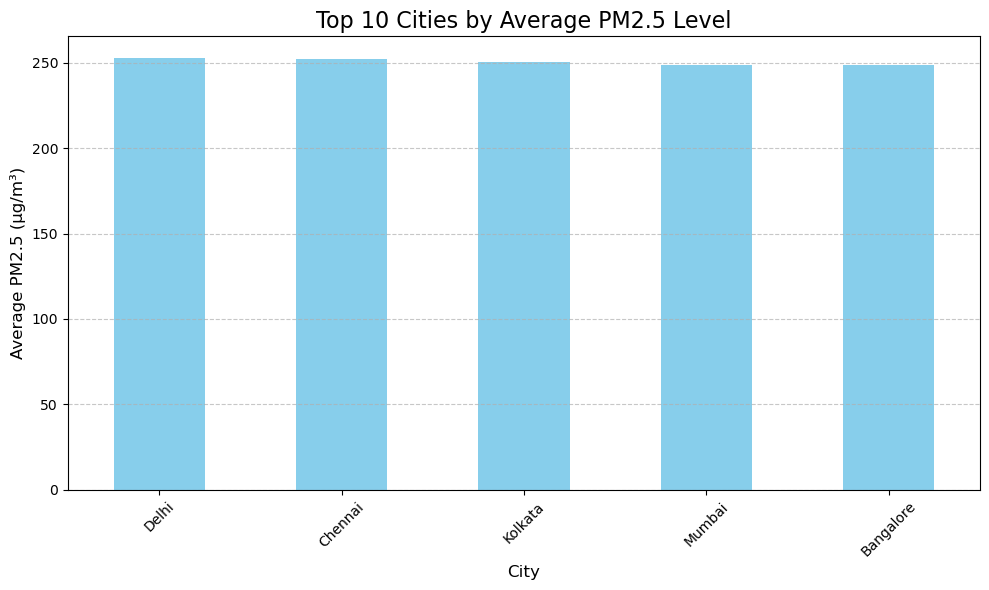

In [26]:
# Plot bar chart
plt.figure(figsize=(10,6))
city_pm25_avg.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Average PM2.5 Level', fontsize=16)
plt.ylabel('Average PM2.5 (μg/m³)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Plot a line chart showing PM2.5 trend for Delhi over time

In [27]:
# Filter data for Delhi
delhi_data = df[df['City'] == 'Delhi'].copy()
# Ensure datetime is sorted
delhi_data['Datetime'] = pd.to_datetime(delhi_data['Datetime'], errors='coerce')
delhi_data = delhi_data.sort_values(by='Datetime')

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([16071., 16436., 16801., 17167., 17532., 17897., 18262., 18628.,
        18993., 19358., 19723., 20089.]),
 [Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025')])

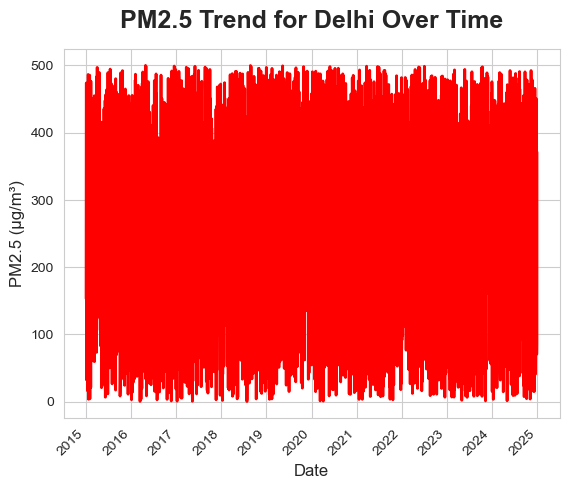

In [28]:
# Plot line chart
sns.lineplot(
    x='Datetime',
    y='PM2.5',
    data=delhi_data,
    color='red',
    linewidth=2
)

# Titles and labels
plt.title("PM2.5 Trend for Delhi Over Time", fontsize=18, fontweight='bold', pad=15)
plt.ylabel("PM2.5 (μg/m³)", fontsize=12)
plt.xlabel("Date", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')


## Compare PM2.5 and PM10 for a specific city using a bar plot

In [29]:
# Choose city
city = "Delhi"  
data = df[df.City == city][['PM2.5', 'PM10']].mean()

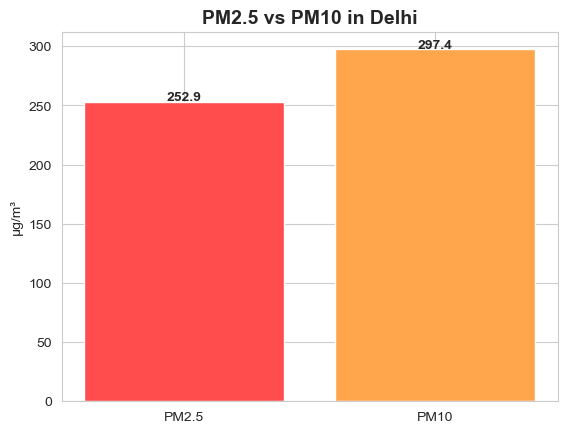

In [30]:
# data for plotting
plt.bar(data.index, data.values, color=['#ff4d4d', '#ffa64d'])
plt.title(f"PM2.5 vs PM10 in {city}", fontsize=14, fontweight='bold')
plt.ylabel("μg/m³")

for i, v in enumerate(data):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', fontweight='bold')

plt.show()

### PM2.5 Distribution Across Cities

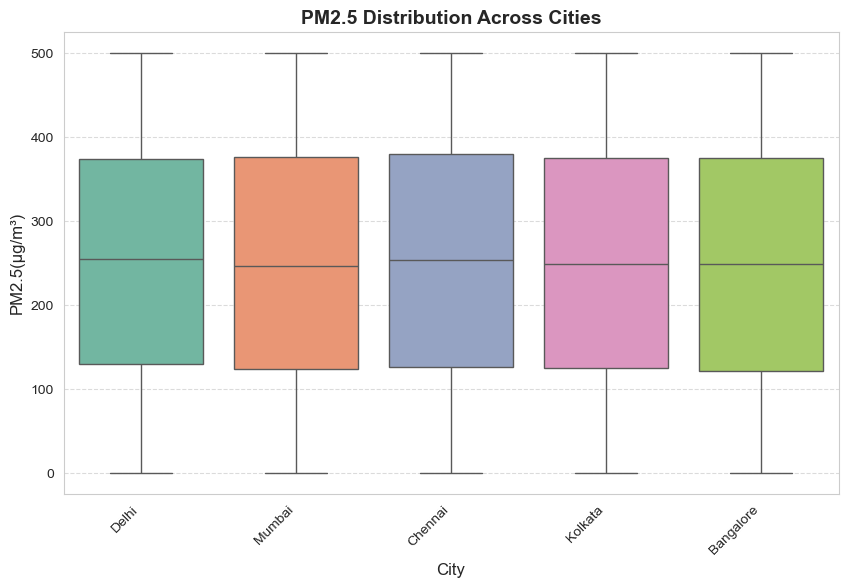

In [31]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='PM2.5', hue='City', data=df, palette='Set2', legend=False)

plt.title("PM2.5 Distribution Across Cities", fontsize=14, fontweight='bold')
plt.xlabel("City",fontsize= 12)
plt.ylabel("PM2.5(μg/m³)", fontsize=12)
plt.xticks(rotation=45,ha='right')# x-axis labels tilt for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Conclusion:** PM2.5 levels vary significantly across cities, with some experiencing much higher pollution than others.


## Heatmap Showing Correlation Between All Pollutants


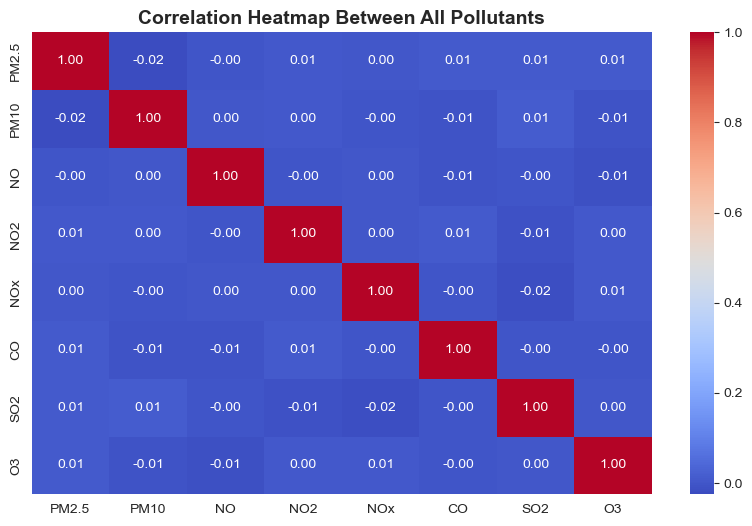

In [32]:
pollutants =  ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
df_pollutants = df[pollutants]

corr = df_pollutants.corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap Between All Pollutants", fontsize=14, fontweight='bold')
plt.show()

##**Conclusion:** The heatmap highlights varying correlation patterns among all measured pollutants, with certain particulate and gaseous pollutants showing strong relationships, while others remain largely independent.


## Comparative Analysis of Average PM2.5 Levels Before and After COVID-19 Lockdown


In [33]:

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Define lockdown date
lockdown_date = pd.Timestamp("2020-03-24")

# Create Period column
df.loc[df['Date'] < lockdown_date, 'Period']= 'Before lockdown'
df.loc[df['Date'] >= lockdown_date, 'Period']= 'After Lockdown'

# Calculate average PM2.5
avg_pm25 = df.groupby('Period')['PM2.5'].mean()

print(avg_pm25)

Period
After Lockdown     251.572833
Before lockdown    249.706841
Name: PM2.5, dtype: float64


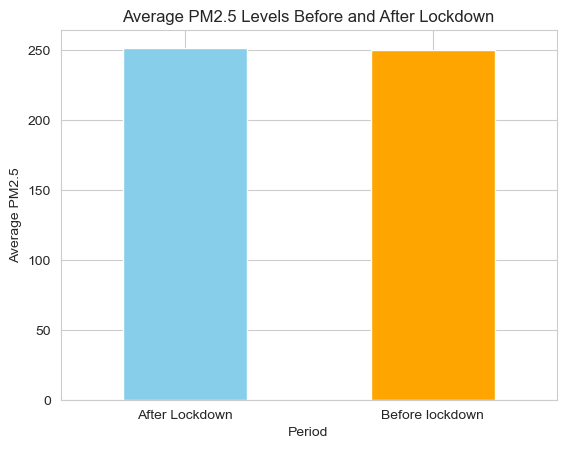

In [34]:
avg_pm25.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average PM2.5 Levels Before and After Lockdown")
plt.xlabel("Period")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=0)
plt.show()

### Comparative Analysis of PM2.5 Levels Before and After COVID-19 Lockdown in India


# Advance analysis

### City with the Most Consistent Air Quality (Lowest PM2.5 Standard Deviation)


In [35]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Group by City and calculate standard deviation
std_pm25 = df.groupby('City')['PM2.5'].std()


# Identify city with lowest standard deviation
most_consistent_city = std_pm25.idxmin()
lowest_std_value = std_pm25.min()

print(f"City with most consistent air quality: {most_consistent_city} (Std Dev: {lowest_std_value:.2f})")

City with most consistent air quality: Delhi (Std Dev: 141.86)


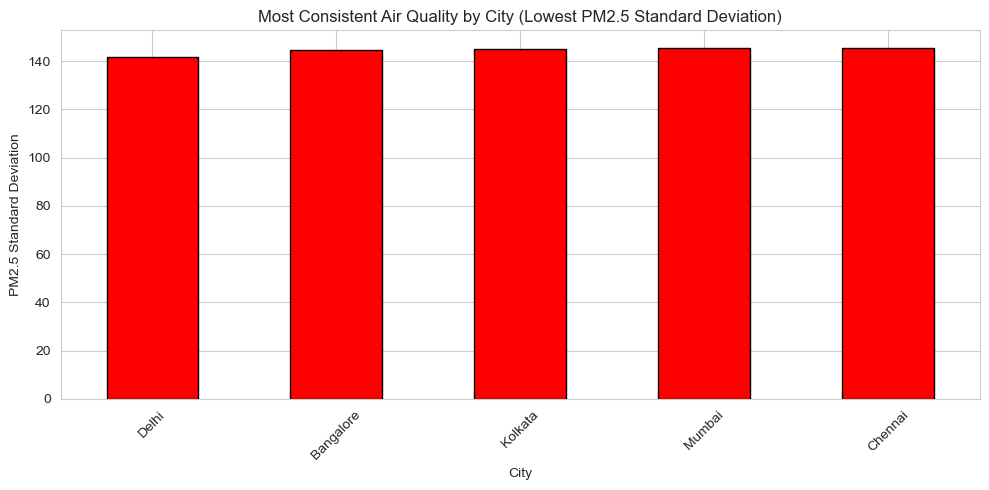

In [36]:
plt.figure(figsize=(10,5))
std_pm25.sort_values(ascending=True).plot(kind='bar', color='red', edgecolor='black')
plt.title("Most Consistent Air Quality by City (Lowest PM2.5 Standard Deviation)")
plt.xlabel("City")
plt.ylabel("PM2.5 Standard Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:** Delhi maintained the most consistent air quality during the observed period.


## City with the Most Fluctuating Air Quality


In [37]:

# Calculate standard deviation of PM2.5 for each city
fluctuation = df.groupby('City')['PM2.5'].std()

# Identify city with highest fluctuation
most_fluctuating_city = fluctuation.idxmax()
highest_std = fluctuation.max()

print(f"City with most fluctuating air quality: {most_fluctuating_city} (Std Dev: {highest_std})")


City with most fluctuating air quality: Chennai (Std Dev: 145.42832988370702)


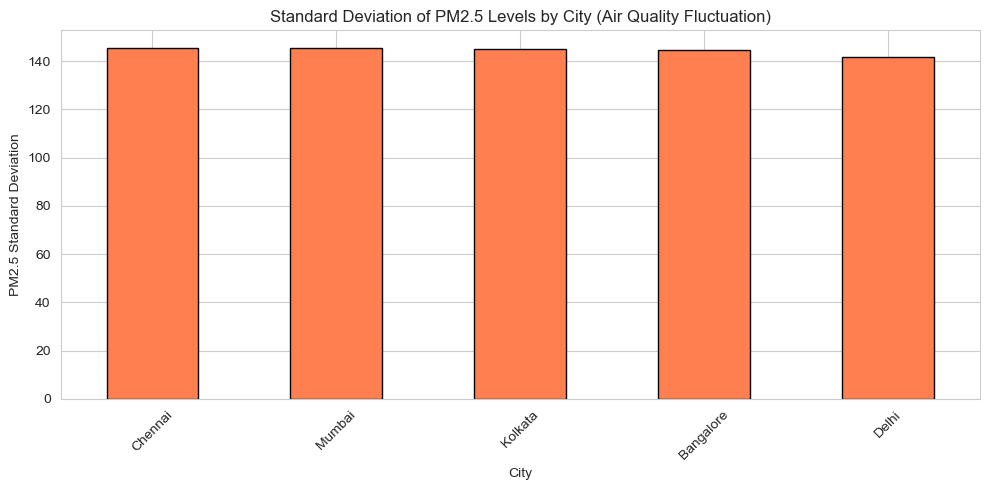

In [38]:

# Plot bar chart
plt.figure(figsize=(10,5))
fluctuation.sort_values(ascending=False).plot(kind='bar', color='coral', edgecolor='black')
plt.title("Standard Deviation of PM2.5 Levels by City (Air Quality Fluctuation)")
plt.xlabel("City")
plt.ylabel("PM2.5 Standard Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:** {Chennai} experienced the most fluctuating air quality during the observed period.


## 📈 Year-on-Year PM2.5 Trend Analysis for the Top 3 Most Polluted Cities in India 🌆


In [39]:
 # Make sure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Datetime'])

# Extract Year into a new column
df['Year'] = df['Date'].dt.year

In [40]:
# Identify top 3 cities with highest average PM2.5
top3_cities = df.groupby('City')['PM2.5'].mean().nlargest(3).index

# Filter data for only these cities
top3_data = df[df['City'].isin(top3_cities)]

# Group by Year and City, then calculate average PM2.5
yearly_trend = top3_data.groupby(['Year', 'City'])['PM2.5'].mean().reset_index()


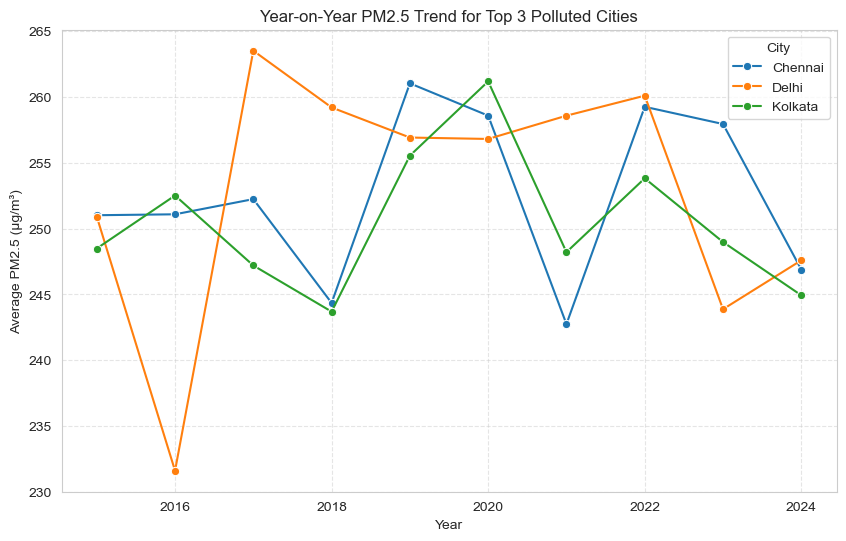

In [41]:
# Plot the trend
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, x='Year', y='PM2.5', hue='City', marker='o')
plt.title('Year-on-Year PM2.5 Trend for Top 3 Polluted Cities')
plt.ylabel('Average PM2.5 (μg/m³)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 🌿 Identifying the Cleanest Month for Each City Based on PM2.5 Levels


In [42]:
df['Date'] = pd.to_datetime(df['Datetime'])

# Extract Year into a new column
df['Month'] = df['Date'].dt.month

In [43]:

monthly_avg = df.groupby(['City', 'Month'])['PM2.5'].mean().reset_index()

cleanest_months = monthly_avg.loc[monthly_avg.groupby('City')['PM2.5'].idxmin()]

print(cleanest_months)


         City  Month       PM2.5
8   Bangalore      9  232.413000
22    Chennai     11  238.247000
24      Delhi      1  243.700000
42    Kolkata      7  241.539355
53     Mumbai      6  232.342333


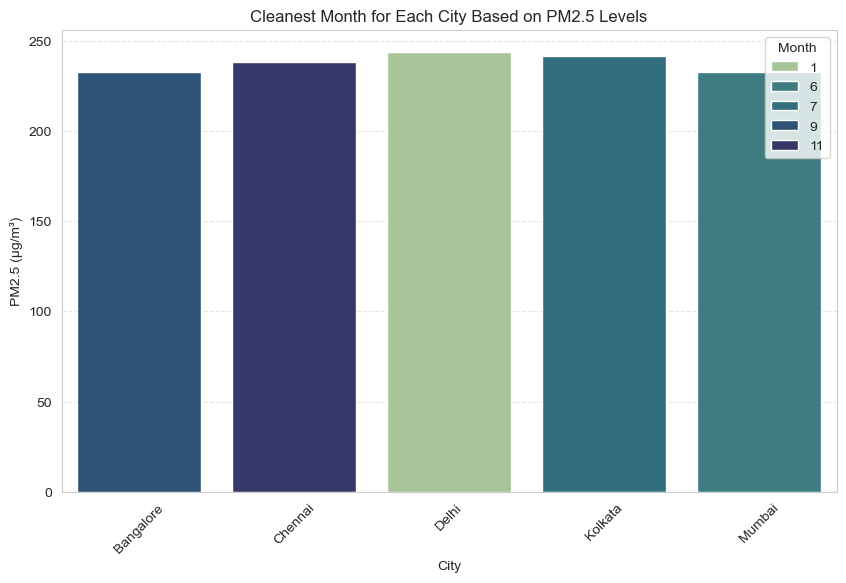

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=cleanest_months, x='City', y='PM2.5', hue='Month', dodge=False, palette='crest')
plt.title('Cleanest Month for Each City Based on PM2.5 Levels')
plt.ylabel('PM2.5 (μg/m³)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


 ## Conclusion: The analysis highlights the month in each city with the lowest PM2.5 concentration, indicating the period of best air quality.

## 📊 Air Quality Index (AQI) Category based on PM2.5


In [45]:



def get_aqi_category_pm25(pm25):
    if pm25 <= 30:
        return "Good"
    elif pm25 <= 60:
        return "Satisfactory"
    elif pm25 <= 90:
        return "Moderately Polluted"
    elif pm25 <= 120:
        return "Poor"
    elif pm25 <= 250:
        return "Very Poor"
    else:
        return "Severe"

# Calculate average PM2.5 for each city
city_avg_pm25 = df.groupby('City', as_index=False)['PM2.5'].mean()

# Assign AQI category
city_avg_pm25['AQI Category'] = city_avg_pm25['PM2.5'].apply(get_aqi_category_pm25)

# Display results
print(city_avg_pm25)


        City       PM2.5 AQI Category
0  Bangalore  248.546838    Very Poor
1    Chennai  252.515138       Severe
2      Delhi  252.905858       Severe
3    Kolkata  250.456885       Severe
4     Mumbai  248.563756    Very Poor


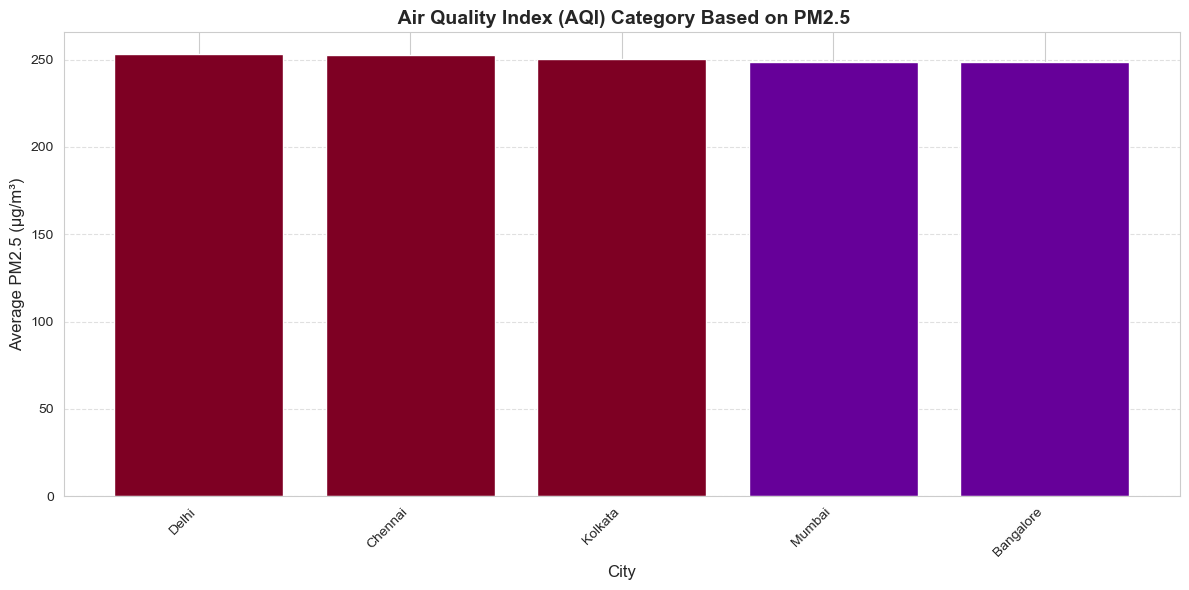

In [46]:


# Define color mapping for categories
aqi_colors = {
    "Good": "#009966",               # Green
    "Satisfactory": "#FFDE33",       # Yellow
    "Moderately Polluted": "#FF9933",# Orange
    "Poor": "#CC0033",               # Red
    "Very Poor": "#660099",          # Purple
    "Severe": "#7E0023"              # Maroon
}

# Sort by PM2.5 value
city_avg_pm25 = city_avg_pm25.sort_values(by='PM2.5', ascending=False)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(
    city_avg_pm25['City'],
    city_avg_pm25['PM2.5'],
    color=[aqi_colors[cat] for cat in city_avg_pm25['AQI Category']]
)

# Labels and title
plt.xlabel("City", fontsize=12)
plt.ylabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.title(" Air Quality Index (AQI) Category Based on PM2.5", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Cities with higher PM2.5 fall into the "Very Poor" and "Severe" categories, indicating critical air pollution levels.

## Insights
- Cleanest city based on PM2.5: 'Banglore'  
- Most polluted city based on PM2.5: 'Delhi' 
- NO₂ levels are highest in 'Delhi', indicating potential industrial emissions.

## Recommendations
1. Promote public transport and electric vehicles in polluted cities.
2. Increase green cover in urban areas.
3. Implement stricter emission controls for industries.
